# Medium Articles Analysis

In [169]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [170]:
#load the data
medium_df=pd.read_csv("medium_data.csv",index_col=[0])
medium_df

,title,author,publication,date,duration,claps,tags_cleaned
0,The Three Bay Areas,keith a. spencer,the bold italic,13-Mar-17,10,7400,"san-francisco,tech,politics,humor,this-just-in"
1,The First Gene-Edited Squid in History Is a Bi...,emily mullin,onezero,11-Aug,5,1100,",reengineering-life,science,gene-editing,neuro..."
2,The Gig Economy Is Failing. Say Hello to the H...,caitlin dewey,onezero,29-Jul,12,5100,"gig-economy,economy,tech,digital-life,business"
3,10 Bizarre Money Habits Making Millennials Richer,refinery29 uk,refinery29,7-Aug,4,3800,"money,saving,saving-money,millennials,hacks"
4,Google's Remote Work Policy Has 9 Great Tips Y...,inc. magazine,inc magazine,4-Aug,5,4200,"remote-working,work,google"
...,...,...,...,...,...,...,...
2696,Decapitating Consciousness,robert epstein,the awl,6-Mar-17,16,1700,"consciousness,brain,neuroscience,science,edito..."
2697,A Career Retrospective—10 years working in tech,sailor mercury,No Publication,6-Mar-17,17,3200,"machine-learning,artificial-intelligence,techn..."
2698,How reader engagement helped unearth the Shell...,ernst pfauth,the correspondent,6-Mar-17,8,599,"climate-change,environment,journalism,shell,co..."
2699,A History and Future of the Rise of the Robots,r. david dixon jr.,hackernoon.com,4-Mar-17,14,971,"technology,future,technology,basic-income,futu..."


In [161]:
#Verify if we have any null values
meduim_df.isna().sum()

title           0
author          0
publication     0
date            0
duration        0
clap            0
claps           0
tag             0
tags_cleaned    0
dtype: int64

In [162]:
#verify if we have any duplicated data
medium_df.duplicated().sum()

# 1. Analysis

# 1.0. Data

In [165]:
print("No.of unqiue Articles : ",medium_df.shape[0])
print("No.of unique Publications in our data : ",medium_df.publication.nunique())
print("No.of unique Authors in our data : ",medium_df.author.nunique())
print("No.of unique Tags in our data : ",tags_df["tags"].nunique())   # this is taken from the data frame created 1.6 section

No.of unqiue Articles :  2701
No.of unique Publications in our data :  335
No.of unique Authors in our data :  1597
No.of unique Tags in our data :  2538


## 1.1. Claps

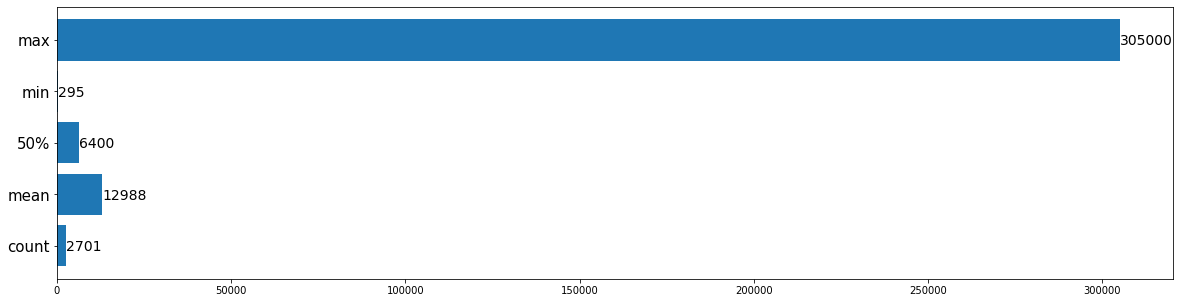

In [69]:
claps={}
claps=medium_df["claps"].describe()[["count","mean","50%","min","max"]]
plt.figure(figsize=(20,5))
plt.barh(claps.keys(),claps.values)
plt.yticks(fontsize=(15))
for i,v in  enumerate(claps.values):
    plt.text( v+0.5 ,i-0.1 , str(int(v)), color='black',fontsize=14)

## Observations:
1. We have a total of 2701 records.
2. Mean(Average) of the claps is 12988 and Median(50%) of the claps is 6400 it is still a really big number.
3. Minimum claps in our data for a single article is 295 whereas maximum is ooping 305,000.

## 1.2. What should be the length of the article?

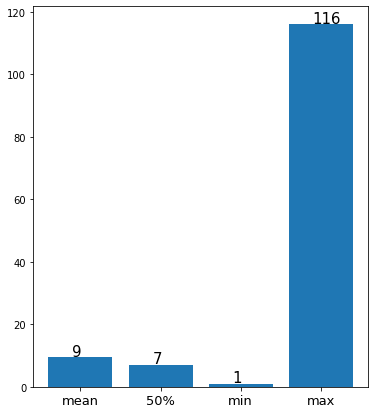

In [70]:
length={}
length=medium_df["duration"].describe()[["mean","50%","min","max"]]
plt.figure(figsize=(6,7))
plt.bar(length.keys(),length.values)
plt.xticks(fontsize=(13))
for i,v in  enumerate(length.values):
    plt.text( i-0.1,v+0.5, str(int(v)), color='black',fontsize=15)

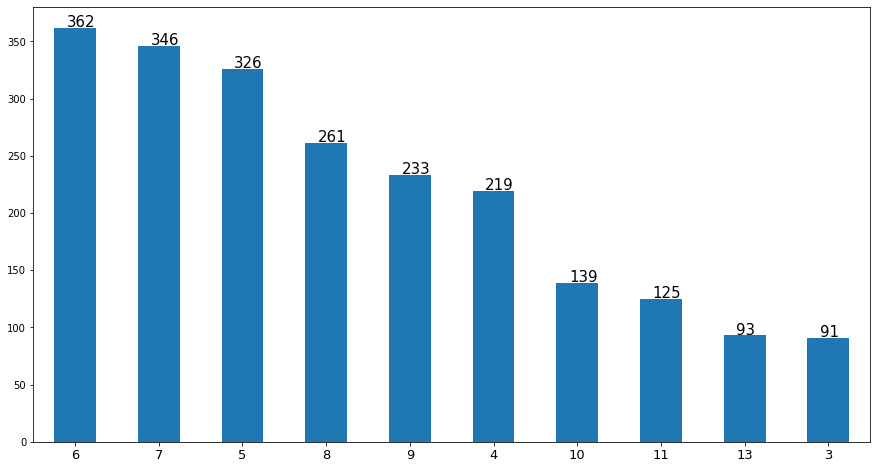

In [71]:
plt.figure(figsize=(15,8))
medium_df["duration"].value_counts()[:10].plot(kind="bar")
plt.xticks(rotation=0,fontsize=13)
for i,v in  enumerate(medium_df["duration"].value_counts()[:10]):
    plt.text( i-0.1,v+1, str(int(v)), color='black',fontsize=15)

### Obseravtions:
1. We have a total of 2701 blogs out of which 1 min is the least and 116mins is the longest. Of course these are outliers.
2. Mean is 8 mins read time and median is 7 min read time. From the secondfigure we cam observe that almost 80% of the articles are under 10 mins. This clearly shows that an ideal would be 4-10 min read time.
3. Though when we are trying to write on any detailed matter and if a small blog does not do the justice then we can try to trim your blog and remove unncessary stuff to make it more readable this way we can keep it in control covering all the necessary stuff.

### 1.3. Does Day of Publishing has any effect?

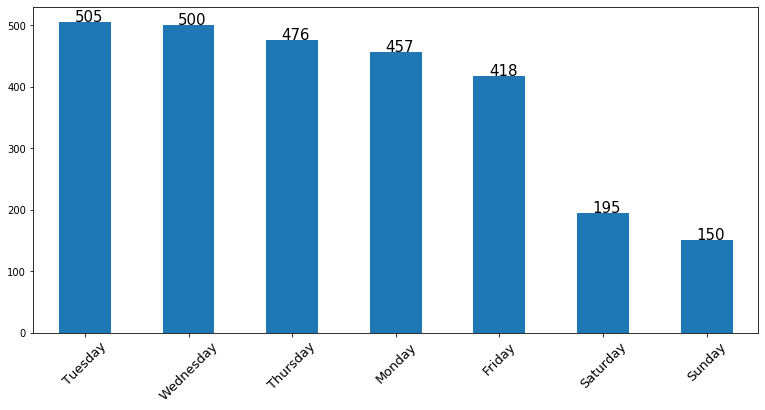

In [72]:
from dateutil import parser
medium_df.date=[parser.parse(dd).strftime("%A") for dd in medium_df.date]
plt.figure(figsize=(13,6))
medium_df.date.value_counts().plot(kind="bar")
plt.xticks(rotation=45,fontsize=13)
for i,v in  enumerate(medium_df["date"].value_counts()[:10]):
    plt.text( i-0.1,v+1, str(int(v)), color='black',fontsize=15)

### Observations:
1. We can see most of the blogs are published on week days. Monday being the most and sunday is with the least.
2. There is a significant drop in weekends.

### 1.4. Authors with more popular articles?

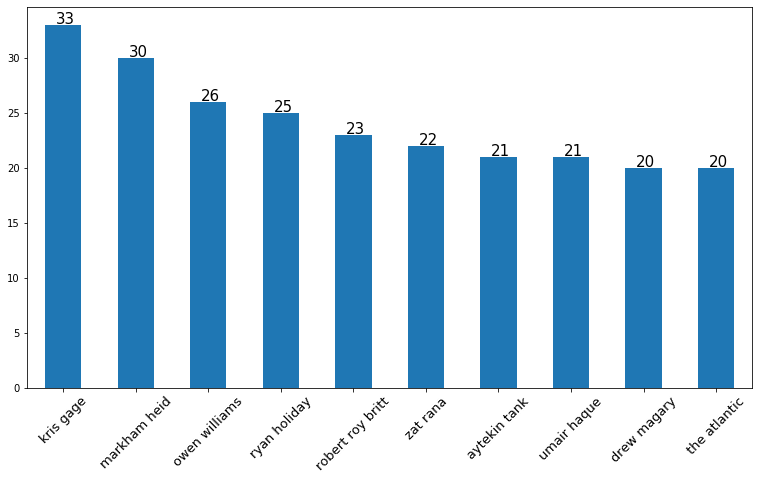

In [73]:
plt.figure(figsize=(13,7))
medium_df.author.value_counts()[:10].plot(kind="bar")
plt.xticks(rotation=45,fontsize=13)
for i,v in  enumerate(medium_df.author.value_counts()[:10]):
    plt.text( i-0.1,v+.1, str(int(v)), color='black',fontsize=15)

### Observations:
1. We can see that kris gage tops the list, actually this list might not be accurate because with little change in data, the outcome might change.


### 1.5. Does publishing from Publication helps?

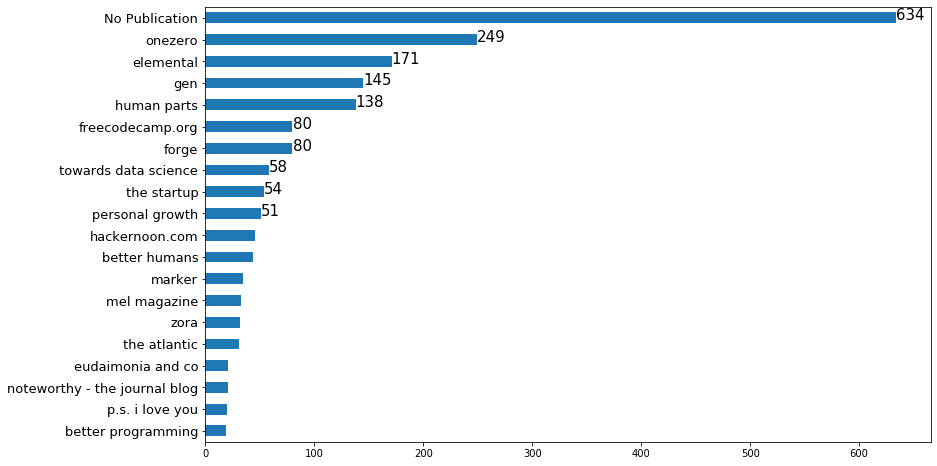

In [84]:
plt.figure(figsize=(13,8))
medium_df.publication.value_counts()[:20].plot(kind="barh")
plt.yticks(rotation=0,fontsize=13)
for i,v in  enumerate(medium_df.publication.value_counts()[:10]):
    plt.text( v+.1,i+0.1, str(int(v)), color='black',fontsize=15)
plt.gca().invert_yaxis()

### 1.6. Popular Tags?

In [75]:
def tokens(x):
    return x.split(',')
from sklearn.feature_extraction.text import CountVectorizer
bow_model=CountVectorizer(ngram_range=(1,1),min_df=1, max_features=100000,tokenizer=tokens, token_pattern="[a-zA-Z0-9]*")
bow_model.fit(pd.Series(medium_df["tags_cleaned"]))
tags_bow=bow_model.transform(medium_df["tags_cleaned"])
print(tags_bow.shape)
tags_bow_df=pd.DataFrame(tags_bow.toarray(),columns=bow_model.get_feature_names())
tags_bow_df

(2701, 2538)


C:\Users\kumarb12\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


,,100daysofmotion,1984,2016-election,2018,2020,2020-presidential-race,2069,3d,8chan,...,yewande-komolafe,yoga,young-people,youth,youth-now,youtube,zeplin,zoom,zuckerberg,zyrtec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
for i in tags_bow_df.columns:
    tags_bow_df[i]=tags_bow_df[i].sum()
    
tags_df=tags_bow_df.iloc[:1].transpose().reset_index()
tags_df.columns=["tags","count"]
tags_df=tags_df.sort_values("count",ascending=False)
tags_df_10=tags_df[:10]

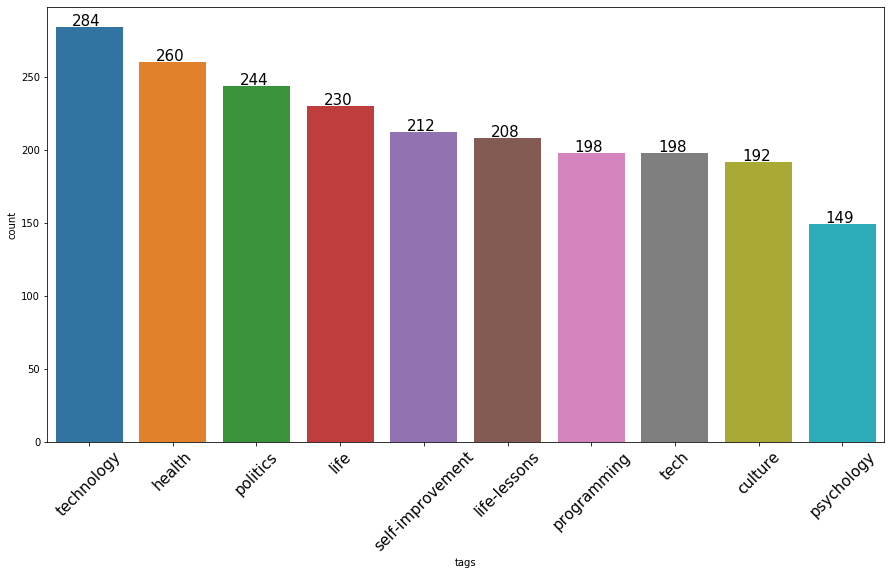

In [77]:
import seaborn as sns
from tqdm import tqdm
from bs4 import BeautifulSoup
import re
import nltk
from nltk import word_tokenize 

plt.figure(figsize=(15,8))
sns.barplot(tags_df_10["tags"],tags_df_10["count"])
plt.xticks(rotation=45,fontsize=15)
for i,v in  enumerate(tags_df_10['count']):
    plt.text( i-0.2,v+1, str(int(v)), color='black',fontsize=15)

## 1.7. Titles:
    

### 1.7.1. Title words

In [78]:
pre_processed_reviews=[]
def text_Preprocessing(reviews):
    
    
    """ This will clean the text data, remove html tags, remove special characters and then tokenize the reviews to apply Stemmer on each word token."""
    
    pre_processed_reviews=[]
    
    for review in tqdm(reviews.values):
        review= BeautifulSoup(review,'lxml').getText()#remove html tags
        #review=re.sub('[^A-Za-z0-9]+',' ',review) #remove special chars
        # review=re.sub("n't","not",review)
        review=word_tokenize(str(review.lower())) #tokenize the reviews into word tokens
        review=' '.join(word for word in review if word not in ["the","is","of","and","on","in","to","for","it","are","we"])
        pre_processed_reviews.append(review.strip())
    return pre_processed_reviews

In [79]:
preprocessed_desc=text_Preprocessing(medium_df["title"])
medium_df["title"]=preprocessed_desc

100%|█████████████████████████████████████| 2701/2701 [00:04<00:00, 625.49it/s]


In [80]:
from sklearn.feature_extraction.text import CountVectorizer
bow_model=CountVectorizer(ngram_range=(1,3),min_df=10, max_features=100000)
bow_model.fit(pd.Series(medium_df["title"]))
titles_bow=bow_model.transform(medium_df["title"])
title_bow_df=pd.DataFrame(titles_bow.toarray(),columns=bow_model.get_feature_names())
title_bow_df

,000,10,19,2018,2019,2020,about,actually,advice,after,...,you know,you need,you re,you should,you think,you want,your,your brain,your life,yourself
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2697,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
for i in title_bow_df.columns:
    title_bow_df[i]=title_bow_df[i].sum()
titles_df=title_bow_df.iloc[:1].transpose().reset_index()
titles_df.columns=["title","count"]
titles_df.head()

,title,count
0,000,17
1,10,33
2,19,29
3,2018,18
4,2019,21


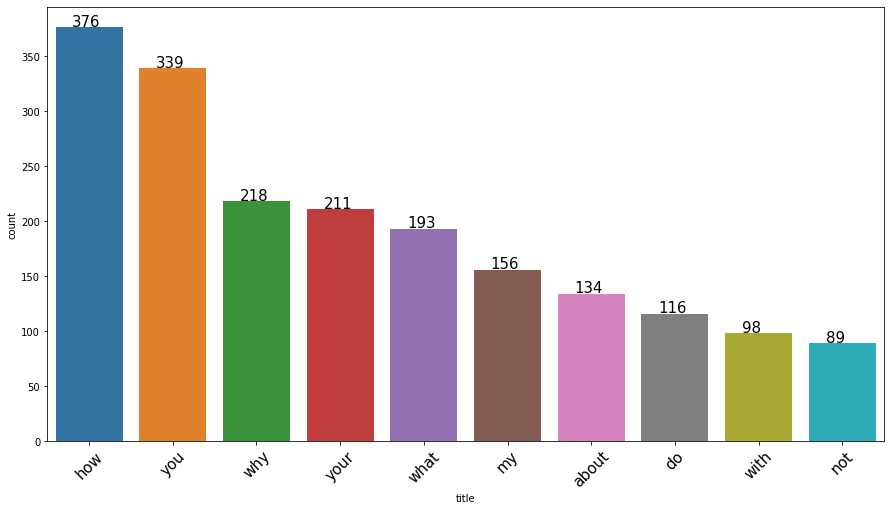

In [82]:
titles_df=titles_df.sort_values("count",ascending=False)[:10]
plt.figure(figsize=(15,8))
sns.barplot(titles_df["title"],titles_df["count"])
plt.xticks(rotation=45,fontsize=15)
for i,v in  enumerate(titles_df['count']):
    plt.text( i-0.2,v+1, str(int(v)), color='black',fontsize=15)

### Observations:

1. we can see top words in the title are mostly question related, Why, what, how? This makes sense most of the time reader will have the same question on their mind.
2. We can observe that in most of the blogs, they used you and your which means that addresing the reader in title itself.
2. The idea should be to use a question in the title and answer it through your blog.
3. we can keep the length of the title to under 10 words to make it look pact.

### 1.7.2. Length of the Title

In [86]:
title_len=[]
for i in medium_df.title:
    title_len.append(len(i))

In [88]:
medium_df["title_length"]=title_len

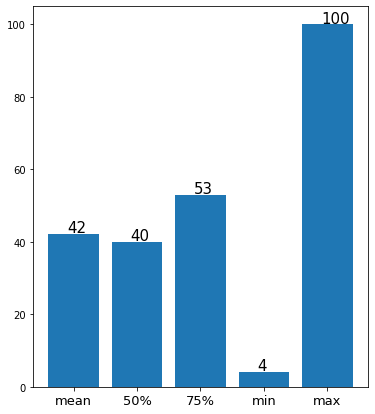

In [95]:
title_length=medium_df["title_length"].describe()[["mean","50%","75%","min","max"]]
plt.figure(figsize=(6,7))
plt.bar(title_length.keys(),title_length.values)
plt.xticks(fontsize=(13))
for i,v in  enumerate(title_length.values):
    plt.text( i-0.1,v+0.5, str(int(v)), color='black',fontsize=15)

Text(0.5, 0, 'Title Length (in Characters) ')

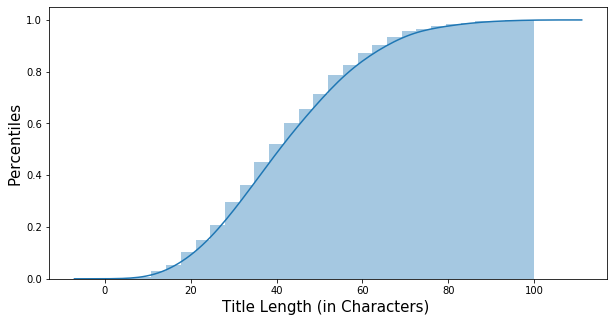

In [157]:
plt.figure(figsize=(10,5))
kwargs = {'cumulative': True}
sns.distplot(medium_df.title_length, hist_kws=kwargs, kde_kws=kwargs)
plt.ylabel("Percentiles",fontsize=15)
plt.xlabel("Title Length (in Characters) ",fontsize=15)

In [147]:
import numpy as np
quantiles={}
for i in [0,0.1,0.2,.3,.4,.5,.6,.7,.8,.9,1]:
    quantiles[str(i*100)]=medium_df["title_length"].quantile(i)

<BarContainer object of 11 artists>

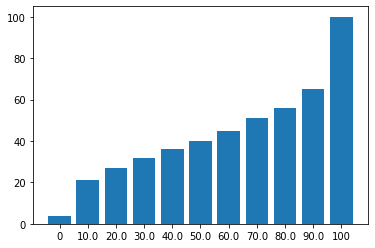

In [148]:
plt.bar(quantiles.keys(),quantiles.values())

#### Observations:
1. It is observed that more than 90% of the titles in our data are less than 65 charcters